In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

In [16]:
df = pd.read_csv('..\datasets\dataset.csv')

C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### low_qualified column :
- change type to int and select 0 and 1 values only
### drop columns unnamed

In [17]:
df = df[df['low_qualified'].eq('0') | df['low_qualified'].eq('1')]
df.drop(['Unnamed: 11','Unnamed: 12'],axis=1,inplace= True)

### from 01-EDA powerbi report and 02-EDA notebook i get the right values for each group 

In [18]:
count =df['ad_group'].value_counts().to_frame()
high_ad=list(count[(count['ad_group']<39835) & (count['ad_group']>350)].index)
med_ad = list(count[(count['ad_group'] <= 350) & (count['ad_group']>100)].index)
low_ad = list(count[ (count['ad_group'] <= 100)].index)

In [19]:
df.loc[df['ad_group'].isin(high_ad),'ad_group']='high_ad'
df.loc[df['ad_group'].isin(med_ad),'ad_group']='med_ad'
df.loc[df['ad_group'].isin(low_ad),'ad_group']='low_ad'

In [20]:
df['ad_group'].value_counts()

none       39835
low_ad     31877
med_ad     14979
high_ad     4358
Name: ad_group, dtype: int64

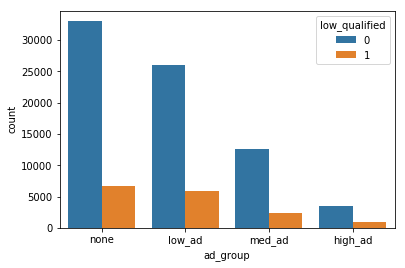

In [15]:
sns.countplot(x='ad_group',hue='low_qualified' , data = df)
plt.show()

In [21]:
df['campaign']=df['campaign'].replace('(none)','none')

In [22]:
count =df['campaign'].value_counts().to_frame()
high_campaign=list(count[(count['campaign']<24384) & (count['campaign']>500)].index)
med_campaign = list(count[(count['campaign'] <= 500) & (count['campaign']>100)].index)
low_campaign = list(count[ (count['campaign'] <= 100)].index)

In [23]:
df.loc[df['campaign'].isin(high_campaign),'campaign']='high_campaign'
df.loc[df['campaign'].isin(med_campaign),'campaign']='med_campaign'
df.loc[df['campaign'].isin(low_campaign),'campaign']='low_campaign'

In [24]:
df['campaign'].value_counts()

high_campaign    29667
none             24384
med_campaign     23863
low_campaign     12427
Name: campaign, dtype: int64

### cluster values of lead_source into main catagories

In [25]:
df_n = df

In [35]:
# lead source cleaning 
Facebook_source =['facebook' , 'fb comment' , 'fb messenger']
Whatsapp_source =['whatsapp' , 'whatapp' , 'whastsapp' , 'whastapp']
Instegram_source = ['instagram page referral' ,'instagram message', 'instagram comment', 'instagram messenger' , 'instagram']
Linkedin_source =['linkedin.com' , 'linkedin']
Telegram_source = ['org.telegram.messenger']
Referral_source =['referral' , 'personal referral / amany' , 'personal referral / ghanima' 
           , 'client referral' , 'personal/refea', 'personal/rafea','personal/refae'
           , 'personal/reafea' , 'client/referral' , 'referral from nadine amr' ,
           'referral page', 'personal/referral', 'management referral', 'omar bebars/referral',
           'managment referral', 'management/referral', 'management/referral (nada)', 'referral ghanima']

Personal_source =['personal','personal/ghanima', 'personal abdo', 'personal/aly',
           'personal/azzam', 'personal/ghanim', 'personal/ gena', 'personal aly',
           'personal/location', 'personal - amany', 'personal aly rafea', 'personal attia','personal - abdel-azim']

Call_source =['phone', 'intercom', 'hotline', 'callcenter','call', 'cold call', 'call center resale']

App_source =['com.google.android.gm', 'app', 'mobile app', 'com.google.android.googlequicksearchbox']

Google_source = ['google', 'google/landing page', 'google-landing pages','console.firebase.google.com' ]

Website_source =['landing page', 'm.nearbyme.io','ecosia.org','egyptianstreets.com', 'ventsmagazine.com',
          'timebusinessnews.com', 'realitypaper.com','ampproject.org', 'newshunt360.com', 
          'english.ahram.org.eg' , 'akhbarak.net', 'url-opener.com', 'semrush.com', 
          'acgdigitalmarketing.com', 'app.neilpatel.com', 'website unkown', 'website',
          'residencestyle.com', 'egyptinnovate.com', 'www-cooingestate-com.cdn.ampproject.org', 
          'int.search.myway.com', 'bing.com','smbsalesimplementation.my.salesforce.com',
          'newchat.ktree.org', 'duckduckgo.com', 'realestatechamber-eg.com', 'criteo', 'youtube.com',
          'console.firebase.google.com', 'apps.apple.com','top.criteo.com','vercel.com',
          'blog', 'newsletter', 'tishare.com','blogwritr.com','m.akhbarelyom.com', 'form src=newsletter','localhost']

Yahoo_source = ['us.search.yahoo.com', 'uk.search.yahoo.com', 'search.yahoo.com', 'r.search.yahoo.com', 'ca.search.yahoo.com']

Form_source =['form', 'organic form', 'resale form', 'type form', 'custom form', 'google lead form', 
       'sahel_map_form', 'top component form','organic form direct'] 

Unkwon_source = ['unknown', '(none)', 'none','test']
names_source =  ['Unkwon' , 'Form' ,'Yahoo' ,'Website' ,'Google' ,'App' ,'Call','Personal','Referral',
           'Telegram', 'Linkedin','Instegram' ,'Whatsapp','Facebook']
groups_source = [Unkwon_source , Form_source ,Yahoo_source ,Website_source ,Google_source
                     ,App_source ,Call_source,Personal_source,Referral_source,Telegram_source
                     , Linkedin_source,Instegram_source ,Whatsapp_source,Facebook_source]


In [36]:
for i , source in enumerate(groups_source ):
    df_n.loc[df_n['lead_source'].isin(source),'lead_source']= names_source[i]

In [37]:
df['lead_source'].unique()

array(['Google', 'Facebook', 'App', 'organic search', 'Website', 'Call',
       'sms', 'Whatsapp', 'propertyfinder', 'Yahoo', 'vodafone', 'Unkwon',
       'direct traffic', 'Referral', 'Form', 'Personal',
       'social buildingz campaign', 'Instegram', 'cooing client',
       'Linkedin', 'Telegram'], dtype=object)

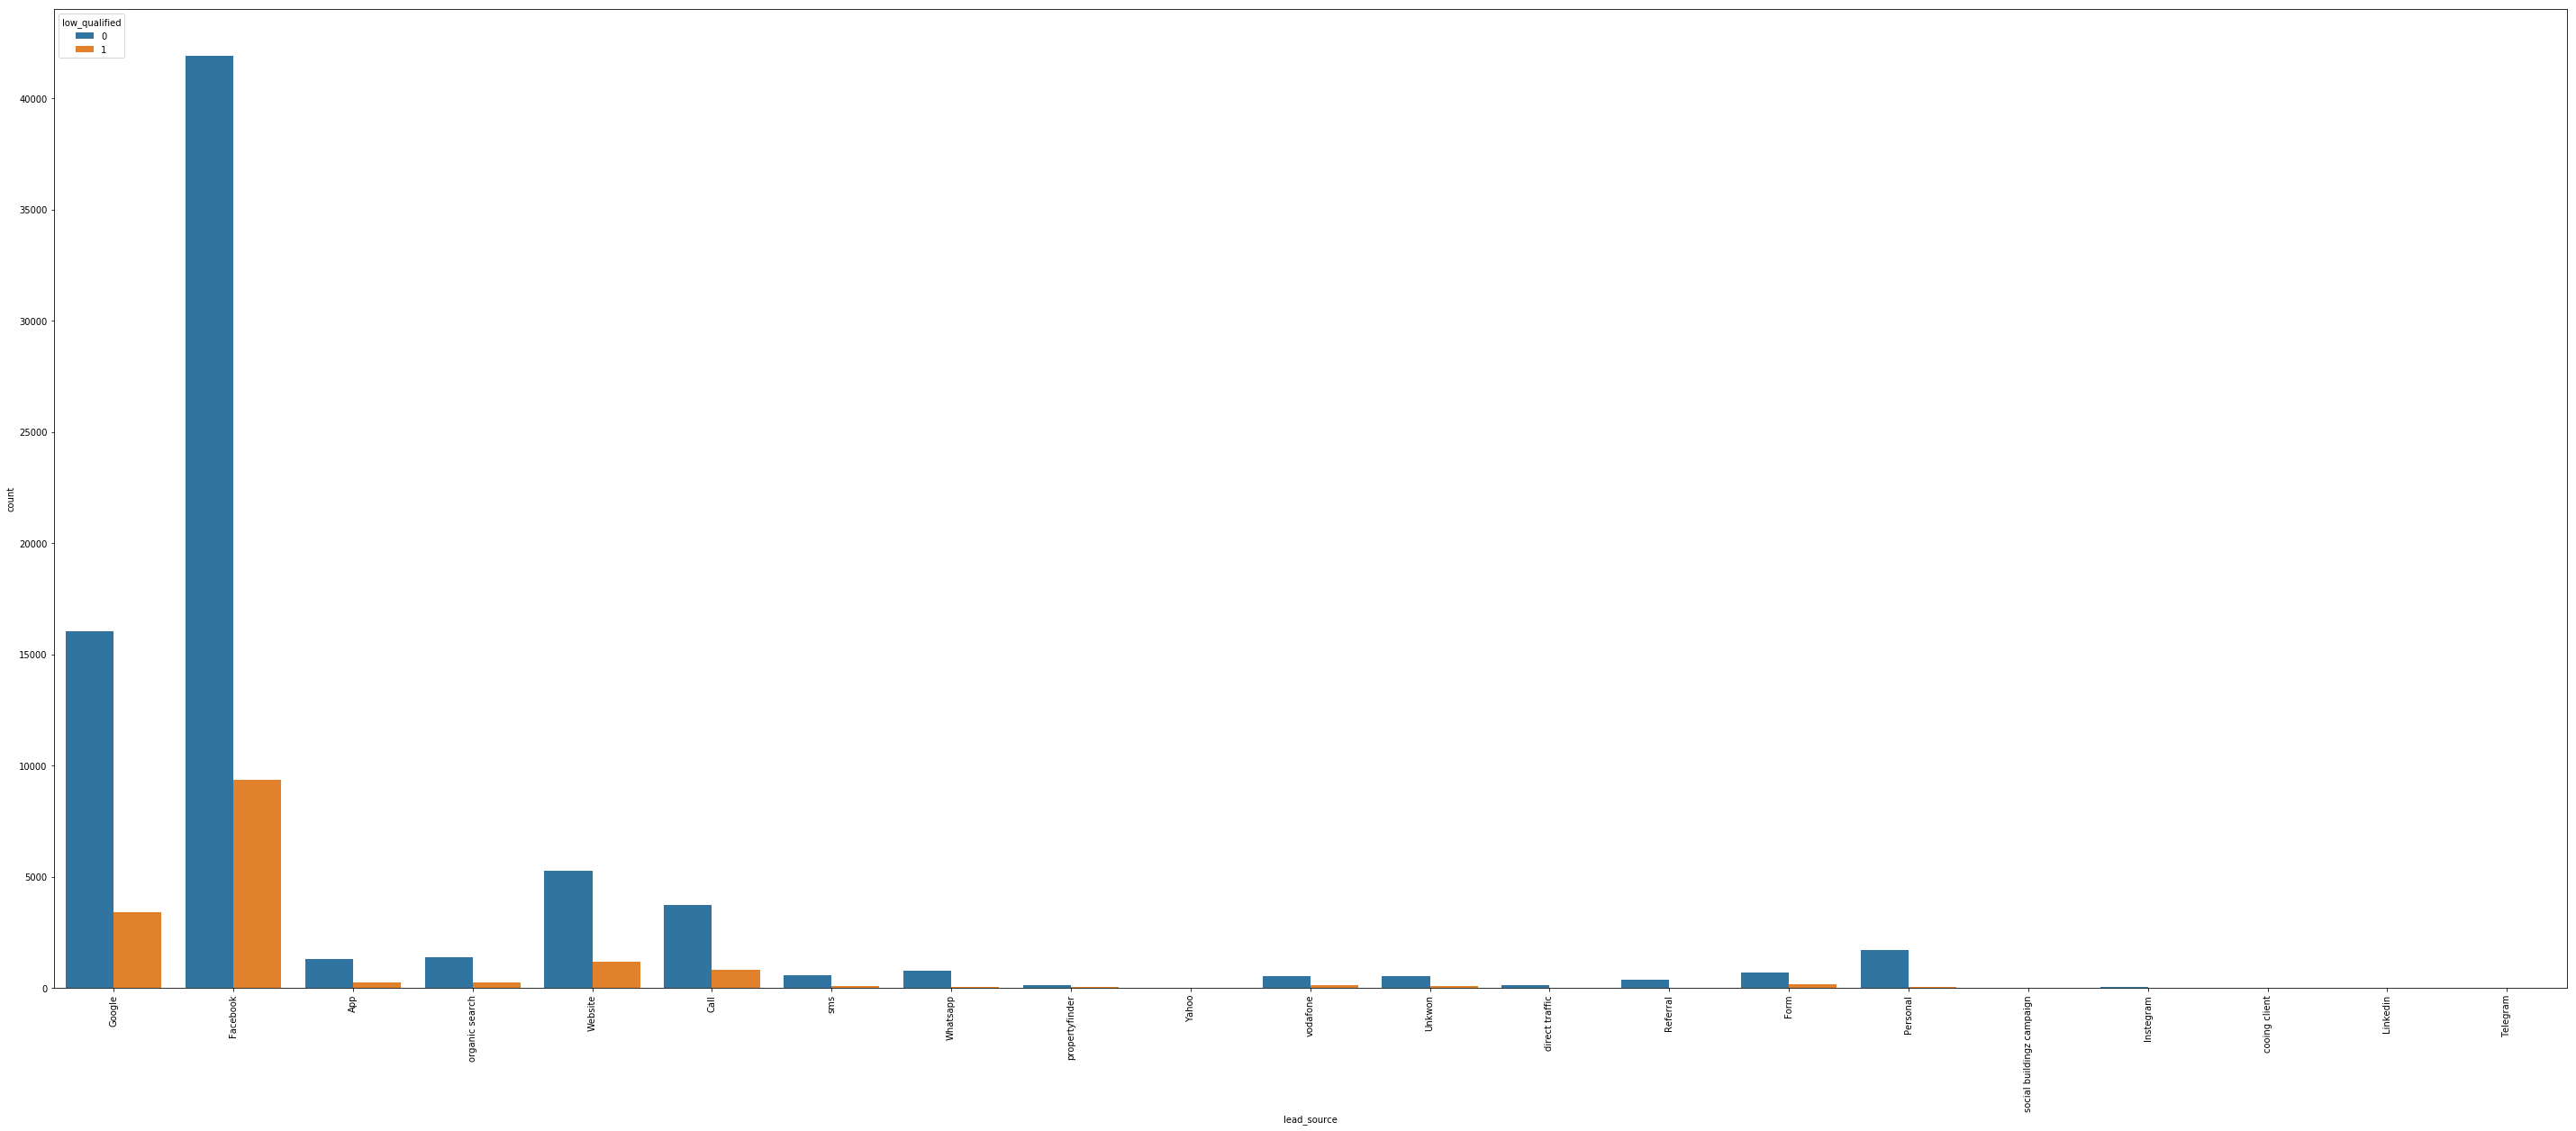

In [38]:
plt.figure(figsize=(50, 20))
plt.xticks(rotation='vertical')
plt.rcParams.update({'font.size': 10})
sns.countplot(x='lead_source',hue='low_qualified' , data = df_n)
plt.show()

### cluster values of method of contract into main catagories

In [45]:
Facebook = ['facebook', 'facebook messenger', 'form facebook', 'l.facebook.com', 'facebook message',
            'facebook comment', 'fb comment' , 'lm.facebook.com', 'facebook message (auc group)', 'fb messenger']
Whatsapp = ['whatsapp', 'whatapp', 'whastsapp', 'whastapp']
Instegram = ['instagram', 'instagram messenger', 'instagram message', 'instagram comment' ]
Linkedin = ['linkedin', 'linkedin.com']
Telegram  = ['org.telegram.messenger']
Referral = ['referral', 'management referral' , 'personal referral / amany' ,
            'management/referral (nada)', 'management/referral', 'managment referral',
            'personal attia', 'personal referral / ghanima', 'omar bebars/referral', 
            'client referral', 'referral from nadine amr','instagram page referral', 
            'facebook page referral', 'client/referral','referral ghanima' ]        

Personal = ['personal/azzam', 'personal/ghanim','personal/ gena', 'personal/refea', 
            'personal/rafea', 'personal/refae','personal/reafea', 'personal/location',
            'personal abdo', 'personal/aly','personal - amany', 'personal aly rafea',
            'personal - abdel-azim', 'personal','personal/ghanima','personal aly']

Call = ['phone', 'intercom', 'call center resale', 'callcenter','call', 'cold call']
App =[ 'app', 'com.google.android.googlequicksearchbox' ]
Google =[ 'google', 'com.google.android.gm' ,'console.firebase.google.com']
Website =['website', 'm.nearbyme.io', 'ecosia.org', 'egyptianstreets.com', 'ampproject.org','newshunt360.com',
              'english.ahram.org.eg', 'semrush.com', 'acgdigitalmarketing.com', 
              'criteo','akhbarak.net','url-opener.com','ventsmagazine.com',
              'timebusinessnews.com','realitypaper.com', 'youtube.com', 'egyptinnovate.com', 
              'www-cooingestate-com.cdn.ampproject.org', 'duckduckgo.com', 'nawy.com', 
              'realestatechamber-eg.com', 'app.neilpatel.com' , 'newchat.ktree.org','residencestyle.com',
              'bing.com', 'int.search.myway.com', 'smbsalesimplementation.my.salesforce.com' ,
              'top.criteo.com','vercel.com', 'blog', 'newsletter', 'tishare.com','m.akhbarelyom.com',
              'form src=newsletter',]

Yahoo = ['r.search.yahoo.com', 'search.yahoo.com', 'uk.search.yahoo.com', 'ca.search.yahoo.com', 'us.search.yahoo.com']
Form = ['generic form', 'top compounds form', 'organic form', 'form adwords', 'organic form direct',
            'sahel_map_form',  'form src=linkedin', 'type form' , 'resale form', 'form', 'top component form' ,
            'google lead form', 'custom form']
Unkwon = ['(none)','2022-04-05 18:59:39.015907','test','localhost']
names2 = ['Unkwon' , 'Form' , 'Yahoo' ,'Website' ,'Google' ,'App','Call','Personal','Referral',
              'Telegram' ,'Linkedin' ,'Instegram' ,'Whatsapp' , 'Facebook']
groups2= [Unkwon , Form , Yahoo ,Website ,Google ,App,Call,Personal,Referral,Telegram ,Linkedin ,Instegram ,Whatsapp , Facebook]

In [46]:
for i , group in enumerate(groups2):
    df_n.loc[df_n['method_of_contact'].isin(group),'method_of_contact']= names2[i]

In [47]:
df_n['method_of_contact'].unique()

array(['Form', 'Facebook', 'Whatsapp', 'Call', 'Website', 'Yahoo',
       'vodafone', 'App', 'Referral', 'Google', 'generic contact us',
       'Personal', 'social buildingz campaign', 'personal/referral',
       'blogwritr.com', 'Instegram', 'propertyfinder', 'Unkwon',
       'apps.apple.com', 'cooing client', 'Linkedin', 'Telegram'],
      dtype=object)

### clean lead_time columns and change its type 

In [48]:
df_time = df_n

In [55]:
df_time.head()

,lead_id,customer_name,lead_mobile_network,message,lead_time,method_of_contact,ad_group,lead_source,campaign,location,low_qualified,month,year
0,22,Rajaa M.Mousa,Orange,message: Idea about the best area in Sheik Za...,2022-03-07 12:56:20.523509,Form,none,Google,high_campaign,sodic october plaza,0,3,2022
1,30,Sahar Shalaby,Vodafone,ad_id : 23843176891470664 \nform_id : 36774549...,2019-09-16 13:17:18.459000,Facebook,low_ad,Facebook,med_campaign,o west,0,9,2019
2,42,Mohamed,Vodafone,message:,2022-05-07 02:03:53.589687,Form,low_ad,Google,med_campaign,el gouna for sale & resale,0,5,2022
3,44,Maher Elnakib,Orange,ad_id : 23844249544660664 \nadset_id : 2384424...,2019-12-19 22:56:46.662000,Facebook,low_ad,Facebook,high_campaign,north edge,0,12,2019
4,48,pierre,Vodafone,message:,2022-01-27 05:56:22.806753,Form,none,Google,low_campaign,joulz,0,1,2022


In [50]:
df_time ['lead_time'] =  pd.to_datetime(df_time['lead_time'])

In [52]:
df_time['month']= df_time['lead_time'].dt.month

In [54]:
df_time['year']=df_time['lead_time'].dt.year

In [60]:
df_time['day']=df_time['lead_time'].dt.day

In [62]:
df_network= df_time

### check lead_mobile_network 

In [57]:
df_network['lead_mobile_network'].value_counts()

Vodafone    39043
Orange      18071
Etisalat    16462
Gulf        12068
Others       2422
US_Canda     1149
Europe       1025
WE            881
Name: lead_mobile_network, dtype: int64

# now i clean all data columns i need , so lets save it in new csv file to use it in the next step 
## note that i igonre the location column as it so strange  for me and time is so narrow to get any idea for it  

In [63]:
clean_df = df_network.drop(['lead_id','customer_name','message','lead_time','location'],axis=1)

In [64]:
clean_df.head()

,lead_mobile_network,method_of_contact,ad_group,lead_source,campaign,low_qualified,month,year,day
0,Orange,Form,none,Google,high_campaign,0,3,2022,7
1,Vodafone,Facebook,low_ad,Facebook,med_campaign,0,9,2019,16
2,Vodafone,Form,low_ad,Google,med_campaign,0,5,2022,7
3,Orange,Facebook,low_ad,Facebook,high_campaign,0,12,2019,19
4,Vodafone,Form,none,Google,low_campaign,0,1,2022,27


In [66]:
clean_df.to_csv('..\datasets\clean-dataset.csv')